<a href="https://colab.research.google.com/github/Likelipop/Introduction-to-ML/blob/main/%5BNMMH%20HK2%2024-25%5D_22110039_Tr%E1%BA%A7n%20Ti%E1%BA%BFn%20%C4%90%E1%BA%A1t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/uKAq34QrbwTcbs5Z9 (Submit your .ipynb file)

In [1]:
!git clone "https://github.com/Likelipop/Introduction-to-ML.git"

Cloning into 'Introduction-to-ML'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 1.56 MiB | 5.20 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [5]:
%cd /content/Introduction-to-ML

/content/Introduction-to-ML


#1. LOAD DATA

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [7]:
CURRENT_PATH = os.getcwd()
FINAL_HOUSE_LOAN_PATH = os.path.join(CURRENT_PATH, "final_house_loan.csv")

df = pd.read_csv(FINAL_HOUSE_LOAN_PATH)

In [8]:
df.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


In [9]:
df.describe()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


#2. EXPLORATORY DATA ANALYSIS

<h4>2.1 Cleaning data </h4>

In [10]:
df.isnull().sum()

,0
Gender,0
Age,0
Income (USD),32
Income Stability,12
Property Age,34
Property Location,3
Property Price,0
Loan Sanction Amount (USD),0


In [11]:
numeric_data = df.select_dtypes(include = ['number'])
df[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

In [12]:
df.isnull().sum()

,0
Gender,0
Age,0
Income (USD),0
Income Stability,12
Property Age,0
Property Location,3
Property Price,0
Loan Sanction Amount (USD),0


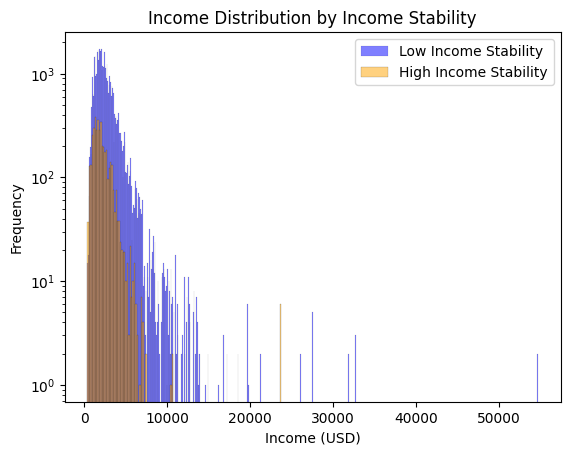

In [13]:
   sns.histplot(df[df['Income Stability'] == "Low"]['Income (USD)'],
                label='Low Income Stability', color='blue', alpha=0.5, log = True)
   sns.histplot(df[df['Income Stability'] != "Low"]['Income (USD)'],
                label='High Income Stability', color='orange', alpha=0.5, log = True)
   plt.xlabel('Income (USD)')
   plt.ylabel('Frequency')
   plt.title('Income Distribution by Income Stability')
   plt.legend()
   plt.show()

In [14]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum()

,0
Gender,0
Age,0
Income (USD),0
Income Stability,0
Property Age,0
Property Location,0
Property Price,0
Loan Sanction Amount (USD),0


<h4>2.2 Visualization features </h4>

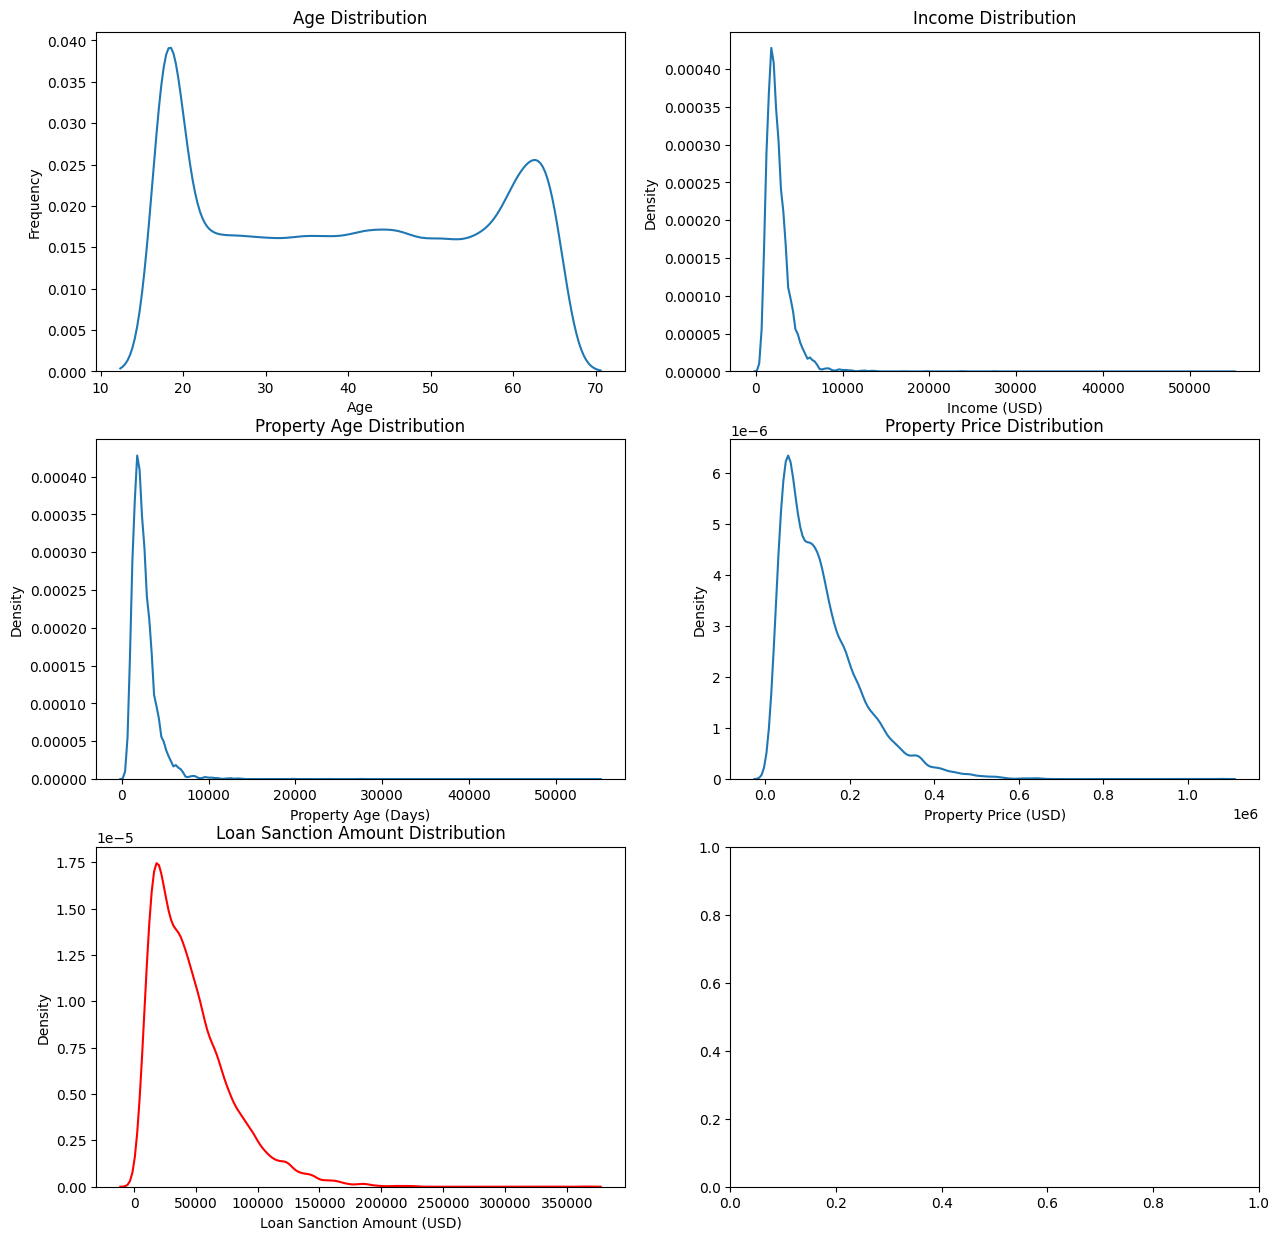

In [16]:
import matplotlib.pyplot as plt

def plot_column(axis, data, title, xlab, ylab, color=None, kind='kde'):
  """Plots a column of data on a given axis.

  Args:
    axis: The matplotlib axis to plot on.
    data: The data to plot.
    title: The title of the plot.
    xlab: The label for the x-axis.
    ylab: The label for the y-axis.
    color: The color of the plot (optional).
    kind: The type of plot ('hist' for histogram, 'line' for line plot, default: 'hist').
  """
  if kind == 'kde':
    sns.kdeplot(data, ax = axis, color = color)
  else :
    data.plot(ax=axis, color=color)

  axis.set_title(title)
  axis.set_xlabel(xlab)
  axis.set_ylabel(ylab)

fig, axis = plt.subplots(3, 2, figsize=(15, 15))

plot_column(axis=axis[0, 0],
            data=df['Age'],
            title='Age Distribution',
            xlab='Age', ylab='Frequency')  # Changed ylab to 'Frequency'

plot_column(axis=axis[0, 1],
            data=df['Income (USD)'],
            title='Income Distribution',
            xlab='Income (USD)', ylab='Density', kind='kde')  # Changed xlab and ylab

plot_column(axis=axis[1, 0],
            data=df['Property Age'],
            title='Property Age Distribution',
            xlab='Property Age (Days)', ylab='Density', kind='kde')  # Changed xlab and ylab

plot_column(axis=axis[1, 1],
            data=df['Property Price'],
            title='Property Price Distribution',
            xlab='Property Price (USD)', ylab='Density', kind='kde')  # Changed xlab and ylab

plot_column(axis=axis[2, 0],
            data=df['Loan Sanction Amount (USD)'],
            title='Loan Sanction Amount Distribution',
            xlab='Loan Sanction Amount (USD)', ylab='Density',
            kind='kde', color='red')  # Changed xlab and ylab

<h4>2.3 Feature Engineering </h4>

**Numerize data**

In [17]:
def normalize_data(real_df):

  df = real_df.copy()
  #numerize features data
  #measuer times
  start_time = time.time()

  for column in df.select_dtypes(include = "object").columns:
    #convert to numeric datatype
    df[column] = df[column].astype("category").cat.codes

  end_time = time.time()

  display(df.head())
  print(f"time : {end_time - start_time}")

  return df

In [18]:
normalized_df = normalize_data(df)

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336


time : 0.021077871322631836


**Sccaling and normalize data**

In [19]:
from sklearn.preprocessing import StandardScaler

columns = normalized_df.columns

scaler = StandardScaler()
normalized_df = scaler.fit_transform(normalized_df)
normalized_df = pd.DataFrame(normalized_df, columns = columns)
normalized_df.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,-0.999112,-1.305639,-0.607057,0.312517,-0.600572,-1.211088,-0.797770,-0.782158
1,1.000889,-0.683957,-0.383279,0.312517,-0.382580,1.263102,0.473220,0.433400
2,-0.999112,-0.186612,-0.473057,0.312517,-0.468503,-1.211088,-0.188204,-0.224427
3,1.000889,1.554096,0.095455,-3.199826,0.103205,-1.211088,2.318747,2.519377
4,-0.999112,1.367591,1.384074,-3.199826,1.383443,1.263102,-0.560862,-0.218121


**Heat map**

<Axes: >

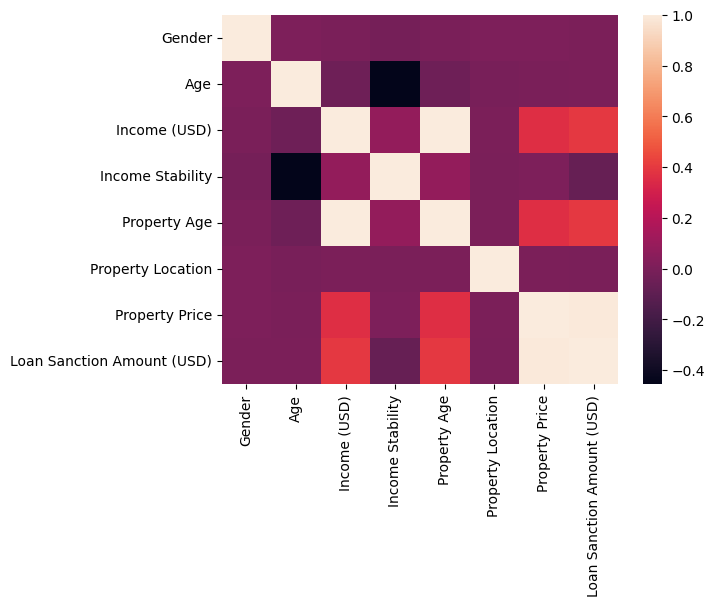

In [20]:
sns.heatmap(normalized_df.corr())

#3. APPLY MACHINE LEARNING MODEL

<h4>3.1 Split training tesing data </h4>

In [21]:
normalized_df.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,-0.999112,-1.305639,-0.607057,0.312517,-0.600572,-1.211088,-0.797770,-0.782158
1,1.000889,-0.683957,-0.383279,0.312517,-0.382580,1.263102,0.473220,0.433400
2,-0.999112,-0.186612,-0.473057,0.312517,-0.468503,-1.211088,-0.188204,-0.224427
3,1.000889,1.554096,0.095455,-3.199826,0.103205,-1.211088,2.318747,2.519377
4,-0.999112,1.367591,1.384074,-3.199826,1.383443,1.263102,-0.560862,-0.218121


In [22]:
train_columns, target_columns = normalized_df.columns[:-1], normalized_df.columns[-1:]

In [23]:
X = normalized_df[train_columns]
y = normalized_df[target_columns]

print(f"training features size : { X.shape}")
print(f"target features size   : {y.shape}")

training features size : (47282, 7)
target features size   : (47282, 1)


In [24]:
train_size = 0.7

X_train, X_test = X[:int(len(X)*train_size)], X[int(len(X)*train_size):]
y_train, y_test = y[:int(len(y)*train_size)], y[int(len(y)*train_size):]
print(f"training set size: {X_train.shape}")
print(f"testing set size : {X_test.shape}")

training set size: (33097, 7)
testing set size : (14185, 7)


<h4>3.2 Linear regrersion </h4>

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def build_linear_model(X_train, y_train):
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)

    return model

model = build_linear_model(X_train, y_train)
#====================================
# Compare on training dataset
# On train set
pred = model.predict(X_train)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=y_train) )
# On test set
pred = model.predict(X_test)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=y_test) )
#====================================

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  0.006995827215676391
mean absolute error of linear model on test set  0.007250773966397635
[[-0.00390161 -0.03921157  0.90828773 -0.0974727  -0.85909182 -0.00177771
   0.97675534]]

[-3.08665433e-05]


<h4>3.3 Ridge regrersion </h4>

This immutation of Linear Regression comes along with L2 regularization. In other words, this was trying to minize the objetive funtion:

$ ||y - Xw||^2_2 + alpha * ||w||^2_2 $

In [26]:
from sklearn.linear_model import Ridge

def build_ridge_model(X_train, y_train, alpha):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    return model

model = build_ridge_model(X_train, y_train,0.3)
#====================================
# Compare on training dataset
# On train set
pred = model.predict(X_train)
print("mean absolute error of ridge model on train set ", mean_absolute_error(y_pred=pred, y_true=y_train) )
pred = model.predict(X_test)
# On test set
ridge_mse = mean_absolute_error(y_pred=pred, y_true=y_test)
print("mean absolute error of ridge model on test set ", ridge_mse )
#=====================================
print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of ridge model on train set  0.00639608058310005
mean absolute error of ridge model on test set  0.006639300568808552
[-0.00388203 -0.03922423  0.71688278 -0.09748315 -0.6676863  -0.00176287
  0.97674883]

[-3.44900146e-05]


<h4>3.4 LASSO regrersion </h4>

This immutation of Linear Regression comes along with L1 regularization. In other words, this was trying to minize the objetive funtion:

$ ||y - Xw||^2_2 + alpha * ||w||_1 $

In [27]:
from sklearn.linear_model import Lasso

def build_lasso_model(X_train, y_train, alpha):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    return model

model = build_lasso_model(X_train, y_train,0.3)
#====================================
# Compare on training dataset
# On train set
pred = model.predict(X_train)
print("mean absolute error of LASSO model on train set ", mean_absolute_error(y_pred=pred, y_true=y_train) )
# On test set
pred = model.predict(X_test)
lasso_mse = mean_absolute_error(y_pred=pred, y_true=y_test)
print("mean absolute error of LASSO model on test set ", lasso_mse )
#=====================================
print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of LASSO model on train set  0.24417129913851057
mean absolute error of LASSO model on test set  0.24782454305420457
[-0.          0.          0.         -0.          0.         -0.
  0.69174477]

[-0.00126344]


<h4>3.5 ElasticNet regrersion </h4>

Linear regression with combined L1 and L2 priors as regularizer:

$1 / (2 * n_samples) * ||y - Xw||^2_2
+ alpha * l1_ratio * ||w||_1
+ 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2$

In [28]:
from sklearn.linear_model import ElasticNet

#declairation
elasticNet_mse_list = [] # for comparation and visualization
def build_elasticNet_model(X_train, y_train, alpha = 0.5, l1_ratio = 0.5):
    model = ElasticNet(alpha=alpha, l1_ratio = l1_ratio)
    model.fit(X_train, y_train)

    return model

# Building model
model = build_elasticNet_model(X_train, y_train)

for i in range(51):
  # Feed dasta for the model
  model = build_elasticNet_model(X_train, y_train, l1_ratio = 0.02*i)
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  #logging
  elasticNet_mse = mean_absolute_error(y_pred=pred_test, y_true=y_test)
  # Print out the loss
  if i%10 == 0:
    print(f"{i} train set ", mean_absolute_error(y_pred=pred_train, y_true=y_train) )
    print(f"{i} test set ", mean_absolute_error(y_pred=pred_test, y_true=y_test) )
  #logging
  elasticNet_mse_list.append(elasticNet_mse)

#====================================
# Compare on training dataset
# On train set
pred = model.predict(X_train)
print("mean absolute error of elasticNet model on train set ", mean_absolute_error(y_pred=pred, y_true=y_train) )
# On test set
pred = model.predict(X_test)
print("mean absolute error of elasticNet model on test set ", elasticNet_mse )
#=====================================
print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.200e+03, tolerance: 3.284e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


0 train set  0.25211841006666463
0 test set  0.25621504222290575
10 train set  0.2789483965911063
10 test set  0.28320325573212757
20 train set  0.3050381533627716
20 test set  0.30959847594748
30 train set  0.32933536200542085
30 test set  0.3342928174650783
40 train set  0.35821358055070296
40 test set  0.3636687578745921
50 train set  0.3930524838061204
50 test set  0.3990775254572212
mean absolute error of elasticNet model on train set  0.3930524838061204
mean absolute error of elasticNet model on test set  0.3990775254572212
[-0.          0.          0.         -0.          0.         -0.
  0.49038094]

[-0.00191262]


<h4>3.6 Comparation: Ridge, Lasso, ElasticNet </h4>

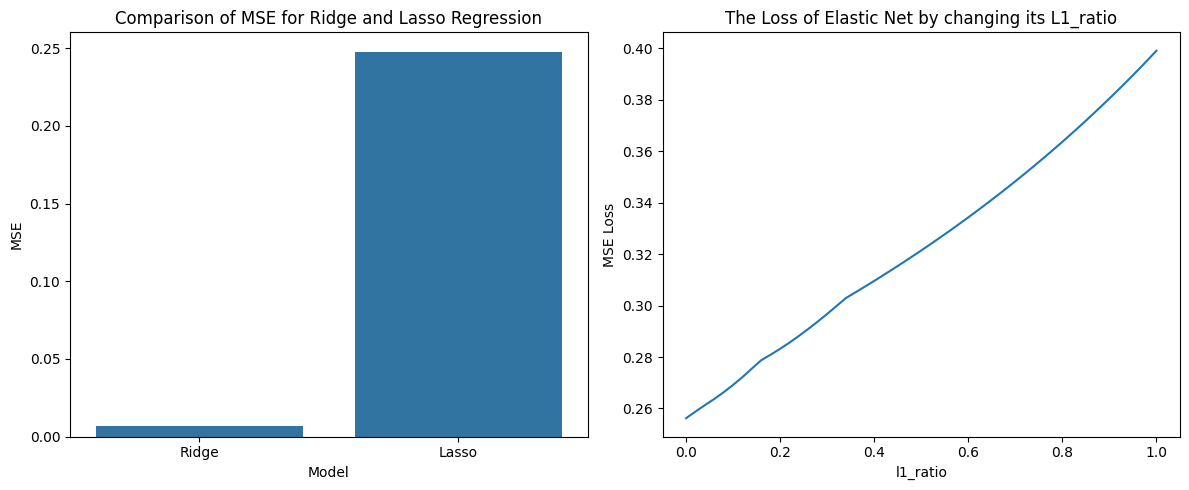

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Bar plot for Ridge and Lasso MSE
data1 = {'Model': ['Ridge', 'Lasso'],
         'MSE': [ridge_mse, lasso_mse]}
df1 = pd.DataFrame(data1)
sns.barplot(x='Model', y='MSE', data=df1, ax=axes[0])
axes[0].set_title('Comparison of MSE for Ridge and Lasso Regression')

# Plot 2: Line plot for ElasticNet MSE
data2 = {"l1_ratio": [0.02 * i for i in range(51)],
         "MSE Loss": elasticNet_mse_list}
df2 = pd.DataFrame(data2)
sns.lineplot(x='l1_ratio', y='MSE Loss', data=df2, ax=axes[1])
axes[1].set_title('The Loss of Elastic Net by changing its L1_ratio')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

as above observed, The ridge is much effective than the Lasso, and when we compared to the Elastic Net in which the l1_ratio is small (approxiamate for Ridge) has a smaller Loss in comparision to the higher l1_ratio, which implied the Lasso regulurization.

<h4>3.7 Polynomial Regression </h4>

<h5>3.7.1 Try on 2nd order </h5>

In [34]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y, degree =2):
    poly_model = make_pipeline(PolynomialFeatures(degree, include_bias=True), LinearRegression())
    poly_model.fit(X, y)

    return poly_model

poly_model = build_pipeline(X_train, y_train,2)
# Compare on training dataset
poly_pred = poly_model.predict(X_train)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=y_train) )

poly_pred = poly_model.predict(X_test)
poly_mse = mean_absolute_error(y_pred=poly_pred, y_true=y_test)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=y_test))

mean absolute error of linear model (with poly transform) on train set  0.004987153944792638
mean absolute error of linear model (with poly transform) on test set  0.005204917929262281


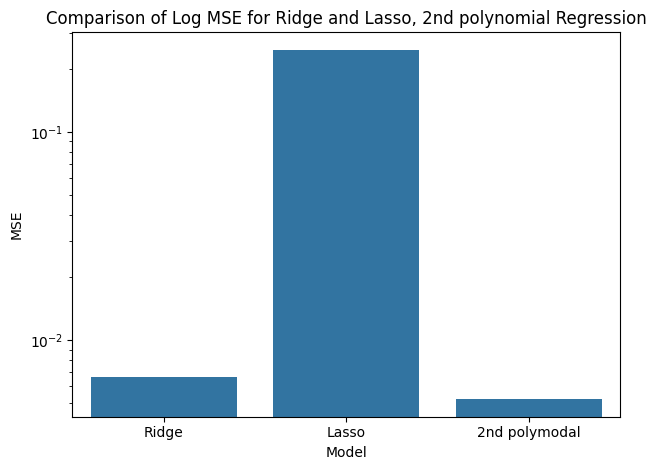

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create a figure and a set of subplots
# Plot 1: Bar plot for Ridge and Lasso MSE
data2 = {'Model': ['Ridge', 'Lasso','2nd polymodal'],
         'MSE': [ridge_mse, lasso_mse, poly_mse]}
df2 = pd.DataFrame(data2)
sns.barplot(x='Model', y='MSE', data=df2, log = True)
plt.title('Comparison of Log MSE for Ridge and Lasso, 2nd polynomial Regression')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<h5>3.7.1 Try on higher order </h5>

In [46]:
#for visualization
train_loss = []
test_loss = []

#try all the order from 1 to 7
for i in range(7):
  poly_model = build_pipeline(X_train, y_train, degree = i+1)
  # Compare on training dataset
  #train loss
  poly_pred = poly_model.predict(X_train)
  train_loss.append(mean_absolute_error(y_pred=poly_pred, y_true=y_train))
  print(f"\norder = {i+1} :")
  print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=y_train) )
  #test loss
  poly_pred = poly_model.predict(X_test)
  test_loss.append( mean_absolute_error(y_pred=poly_pred, y_true=y_test))
  print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=y_test))



order = 1 :
mean absolute error of linear model (with poly transform) on train set  0.006995827215676382
mean absolute error of linear model (with poly transform) on test set  0.007250773966397626

order = 2 :
mean absolute error of linear model (with poly transform) on train set  0.004987153944792638
mean absolute error of linear model (with poly transform) on test set  0.005204917929262281

order = 3 :
mean absolute error of linear model (with poly transform) on train set  0.004895003761616017
mean absolute error of linear model (with poly transform) on test set  0.005153658475888748

order = 4 :
mean absolute error of linear model (with poly transform) on train set  0.0050801952904654425
mean absolute error of linear model (with poly transform) on test set  0.0053763863454427425

order = 5 :
mean absolute error of linear model (with poly transform) on train set  0.00533646690620913
mean absolute error of linear model (with poly transform) on test set  0.006945190580557712

order = 

**Visualization**

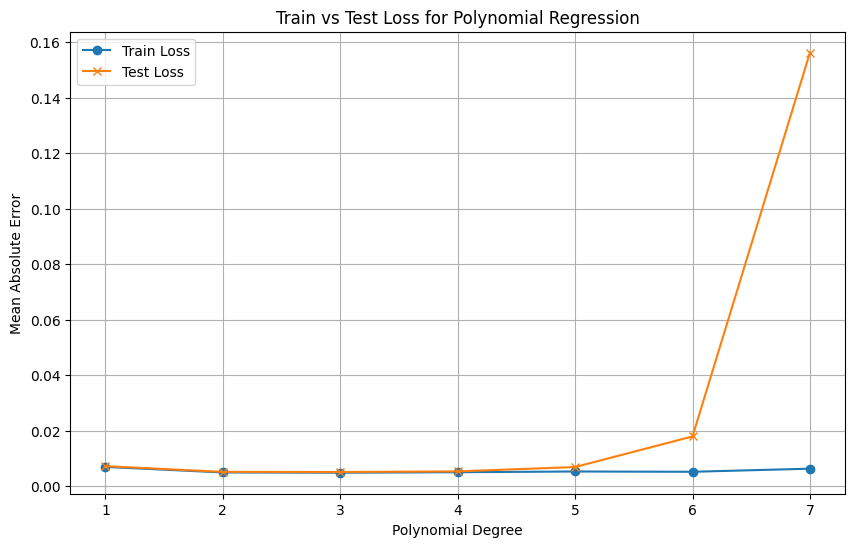

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), train_loss, label='Train Loss', marker='o')
plt.plot(range(1, 8), test_loss, label='Test Loss', marker='x')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Absolute Error')
plt.title('Train vs Test Loss for Polynomial Regression')
plt.xticks(range(1,8))
plt.legend()
plt.grid(True)
plt.show()


As the order of model goes higher, the training_loss seems to remain unchanged, meanwhile the testing loss explode significantly due to Variance - Bias Trade off effect.